# ПИ21-1В
# Сабиров А.А.

## ML2.1 Классификация текстов
Познакомиться с основными методами метрической классификации, их реализацией и приемами работы в scikit-learn.
### Задания для выполнения
1. Загрузите датасет 20 newsgroups;
2. Познакомьтесь с описанием и структурой датасета. Описание можно
найти в документации.
3. Выведите информацию о количественных параметрах датасета;
4. Выведите несколько точек датасета (сами текстовые фрагменты и
значение целевой переменной);
5. Разделите эти данные на тестовую и обучающую выборки;
6. Постройте модель наивного байесовского для классификации
текстов;
7. Оцените качество модели на тестовой выборке с помощью
следующих метрик:
    *   a. достоверность предсказания (accuracy);
    *   b. точность (precision);
    *   c. полнота (recall);
8. Постройте кривую обучения - график зависимости тестовой и
обучающей эффективности от размера обучающей выборки.
9. Сделайте вывод о применимости модели.

---
####  Загрузите датасет 20 newsgroups (1)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics

---
####  Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации (2)

In [ ]:
trainingData = fetch_20newsgroups(subset = 'train')
testData = fetch_20newsgroups(subset = 'test')


print(trainingData.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

---
### Выведите информацию о количественных параметрах датасета (3)


In [ ]:
print(f"trainingData:\n{'Размер filenames:':>30} {trainingData.filenames.shape}\n{'Размер target:':>30} {trainingData.target.shape}")

print(f"\n\ntestData:\n{'Размер filenames:':>30} {testData.filenames.shape}\n{'Размер target:':>30} {testData.target.shape}")

print(f"\n\nРазмер всего датасета: {trainingData.filenames.shape[0] + testData.filenames.shape[0]} значений\n\nКатегории:")
prnt = [print(f"{category:^30}", end=" | " if i%4 else "\n") for i, category in enumerate(trainingData.target_names, 1)]

trainingData:
             Размер filenames: (11314,)
                Размер target: (11314,)


testData:
             Размер filenames: (7532,)
                Размер target: (7532,)


Размер всего датасета: 18846 значений

Категории:
         alt.atheism           |         comp.graphics          |    comp.os.ms-windows.misc     |    comp.sys.ibm.pc.hardware   
    comp.sys.mac.hardware      |         comp.windows.x         |          misc.forsale          |           rec.autos           
       rec.motorcycles         |       rec.sport.baseball       |        rec.sport.hockey        |           sci.crypt           
       sci.electronics         |            sci.med             |           sci.space            |     soc.religion.christian    
      talk.politics.guns       |     talk.politics.mideast      |       talk.politics.misc       |       talk.religion.misc      


---
### Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной) (4)

In [ ]:
def get_point(frame):
    idx = np.random.randint(0, frame.target.shape[0])
    print(f"y: {frame.target_names[frame.target[idx]]}\n\nX:\n\n{frame.data[idx]}")


get_point(trainingData)

y: rec.sport.baseball

X:

From: z_millerwl@ccsvax.sfasu.edu
Subject: ASTROS FOR REAL?
Organization: Stephen F. Austin State University
Lines: 6




WHO THINKS THE ASTROS ARE GOING PLACES???
THEY'RE CURRENTLY FIRST PLACE.
THEY'RE 5-4, 5-1 ON THE ROAD! 



In [ ]:
get_point(testData)

y: soc.religion.christian

X:

From: hudson@athena.cs.uga.edu (Paul Hudson Jr)
Subject: Re: Homosexuality issues in Christianity
Organization: University of Georgia, Athens
Lines: 37

In article <May.13.02.30.39.1993.1545@geneva.rutgers.edu> noye@midway.uchicago.edu writes:
>i believe that the one
>important thing that those who wrote the old and new testament
>passages cited above did NOT know was that there is scientific
>evidence to support that homosexuality is at least partly _inherent_
>rather than completely learned.

Note that "scientific evidence" in this area does not prove any conclusions.
There has been evidence to suggest that a certain part of homosexual's
brains are different from heterosexuals- but that proves very little.

Also notice that the apostles did not have with them the "scientific
evidence" linking certain genes with alcoholism, or stealing with certain
genetic problems.  Even if they did have scientific evidence, I doubt it
would have stopped them from commu

---
### Разделите эти данные на тестовую и обучающую выборки (5)

In [ ]:
# Выше импортированы эти строки, в задании не указано что обязательно разделять через train_test_split
# trainingData = fetch_20newsgroups(subset = 'train')
# testData = fetch_20newsgroups(subset = 'test')



# Либо же через train_test_split:
# news = fetch_20newsgroups(subset = 'all')
# X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=42)


# vectorizer = CountVectorizer()
# vectors_training = vectorizer.fit_transform(X_train)
# vectors_test =  vectorizer.transform(X_test)

---
### Постройте модель наивного байесовского для классификации текстов (6)

In [ ]:
vectorizer = CountVectorizer()

vectors_training = vectorizer.fit_transform(trainingData.data)
vectors_test =  vectorizer.transform(testData.data)

In [ ]:
model = MultinomialNB(alpha = .01)


model.fit(vectors_training, trainingData.target)

MultinomialNB(alpha=0.01)

In [ ]:
y_pred = model.predict(vectors_test)

---
### Оцените качество модели на тестовой выборке с помощью следующих метрик: (7)


*   a. достоверность предсказания (accuracy);
*   b. точность (precision);
*   c. полнота (recall);

**Функция classification_report из модуля sklearn.metrics возвращает отчет о классификации, который содержит основные метрики для оценки производительности классификации. Этот отчет включает в себя следующие метрики для каждого класса и средних значений по всем классам:**



1.   **Точность (Precision)**: Доля верно предсказанных положительных экземпляров среди всех предсказанных положительных экземпляров.
2.   **Полнота (Recall)**: Доля верно предсказанных положительных экземпляров среди всех истинных положительных экземпляров.
3.   **F1-мера (F1-Score)**: Гармоническое среднее точности и полноты. Это баланс между точностью и полнотой.
4.   **Поддержка (Support)**: Количество экземпляров в каждом классе в исходных данных.
5.   **Accuracy (точность)**: Доля верно классифицированных объектов относительно общего числа объектов. Это показывает, какую часть всех объектов модель классифицировала верно.
6.   **Macro avg (среднее по классам)**: Усредненное значение по всем классам для каждой метрики.
7.   **Weighted avg (взвешенное среднее)**: Усредненное значение по всем классам для каждой метрики, взвешенное по числу экземпляров в каждом классе.










In [ ]:
print(metrics.classification_report(testData.target, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       319
           1       0.57      0.78      0.66       389
           2       0.75      0.04      0.07       394
           3       0.55      0.78      0.64       392
           4       0.74      0.83      0.78       385
           5       0.80      0.73      0.76       395
           6       0.79      0.85      0.82       390
           7       0.86      0.90      0.88       396
           8       0.91      0.96      0.94       398
           9       0.95      0.93      0.94       397
          10       0.96      0.96      0.96       399
          11       0.88      0.93      0.91       396
          12       0.77      0.76      0.76       393
          13       0.88      0.83      0.86       396
          14       0.87      0.89      0.88       394
          15       0.89      0.92      0.91       398
          16       0.80      0.89      0.84       364
          17       0.97    

Text(0.5, 58.7222222222222, 'Предсказанные значения')

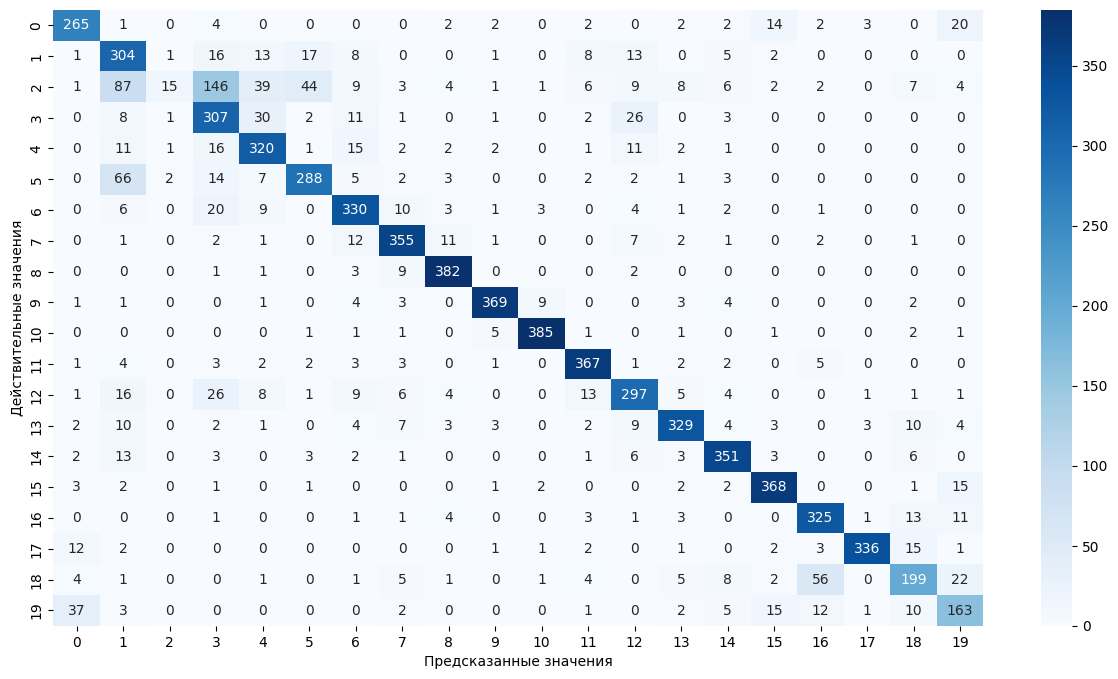

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(testData.target, y_pred)), annot=True, fmt='d', cmap='Blues')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

---
### Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки (8)

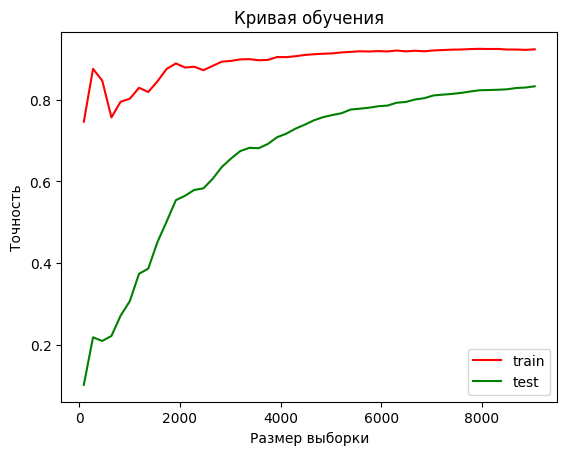

In [ ]:
x_axis = np.linspace(0.01, 1.0, 50)

train_size, train_scores, test_scores = learning_curve(MultinomialNB(), vectors_training, trainingData.target, train_sizes=x_axis, cv=5)

plt.figure()
plt.plot(train_size, np.average(train_scores, axis=1), color="red", label="train")
plt.plot(train_size, np.average(test_scores, axis=1), color="green", label="test")


plt.legend()
plt.title("Кривая обучения")
plt.xlabel("Размер выборки")
plt.ylabel("Точность")
plt.show()

---
### Сделайте вывод о применимости модели (9)

Если судить по ```weighted avg```, то точность классификации равна **80%** что на мой взгляд неплохо и модель можно использовать для дальнейшей работы.



## Дополнительные задания
1.   Постройте модели классификации для данной задачи на основе
следующих методов:
    *   a. логистическая регрессия (LogisticRegression);
    *   b. метод опорных векторов с гауссовым ядром (SVC);
    *   c. метод опорных векторов с полиномиальным ядром (SVC);
    *   d. метод k ближайших соседей (KNeighborsClassifier);
    *   e. многослойный перцептрон (MLP);
    *   f. другие методы по желанию;
1.   Проанализируйте метрики каждой модели и сделайте выводы об их
эффективности и применимости. Сравните эффективность всех этих
моделей и выберите лучшую;

In [ ]:
BANK = pd.DataFrame(np.zeros((8, 8)), dtype=object, index="MultinomialNB LogisticRegression(max_iter=100) LogisticRegression(max_iter=1000) SVC-Gauss SVC-Poly KNeighborsClassifier MLP CatBoostClassifier".split(), columns="confusion_matrix accuracy	precision	recall f1_micro f1_macro average_metrics time(sec)".split())
BANK.index.name = "methods"

BANK

,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LogisticRegression(max_iter=100),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LogisticRegression(max_iter=1000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Gauss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Poly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
### Постройте модели классификации на основе следующих методов: (1)

    *   a. логистическая регрессия (LogisticRegression);
    *   b. метод опорных векторов с гауссовым ядром (SVC);
    *   c. метод опорных векторов с полиномиальным ядром (SVC);
    *   d. метод k ближайших соседей (KNeighborsClassifier);
    *   e. многослойный перцептрон (MLP);
    *   f. другие методы по желанию;

In [ ]:
# logistic = LogisticRegression(max_iter=1000),
# svc_gauss = svm.SVC(kernel='rbf', random_state=42),
# svc_poly = svm.SVC(kernel='poly', random_state=42)
# neigh = KNeighborsClassifier(weights='distance')
# mlp = MLPClassifier()
# cbc = CatBoostClassifier(thread_count=-1,
#                          random_seed=42)


# models = [
#     logistic,
#     svc_gauss,
#     svc_poly,
#     neigh,
#     mlp,
#     cbc
# ]

# for i, model in enumerate(models, 1):
#   row = engine(model, vectors_training, vectors_test, trainingData.target, testData.target)
#   BANK.iloc[i] = row

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from time import perf_counter


def engine(model, X_train, X_test, y_train, y_test):

    start = perf_counter()

    model.fit(X_train, y_train)


    y_pred =  model.predict(X_test)
    con_matrix = metrics.confusion_matrix(y_test, y_pred)


    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')

    f1_micro = metrics.f1_score(y_test, y_pred, average='micro')
    f1_macro = metrics.f1_score(y_test, y_pred, average='macro')

    average_metrics = np.mean(np.array([accuracy, precision, recall, f1_macro, f1_micro]))


    end = perf_counter() - start
    return [con_matrix, accuracy, precision, recall, f1_micro, f1_macro, average_metrics, end]

In [ ]:
BANK.loc["MultinomialNB"] = engine(MultinomialNB(), vectors_training, vectors_test, trainingData.target, testData.target)
BANK

,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LogisticRegression(max_iter=1000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Gauss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Poly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### a. логистическая регрессия (LogisticRegression);

In [ ]:
logistic1 = LogisticRegression()

logistic_row1 = engine(logistic1, vectors_training, vectors_test, trainingData.target, testData.target)

BANK.loc["LogisticRegression(max_iter=100)"] = logistic_row1

BANK

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Gauss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Poly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
logistic2 = LogisticRegression(max_iter=1000)

logistic_row2 = engine(logistic2, vectors_training, vectors_test, trainingData.target, testData.target)
BANK.loc["LogisticRegression(max_iter=1000)"] = logistic_row2

BANK

,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),"[[232, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 6, ...",0.789299,0.791517,0.789299,0.789299,0.78211,0.788305,421.136841
SVC-Gauss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SVC-Poly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### b. метод опорных векторов с гауссовым ядром (SVC);

In [ ]:
svc_gauss = svm.SVC(kernel='rbf', random_state=42)


svc_gauss_row = engine(svc_gauss, vectors_training, vectors_test, trainingData.target, testData.target)

BANK.loc["SVC-Gauss"] = svc_gauss_row

BANK

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),"[[232, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 6, ...",0.789299,0.791517,0.789299,0.789299,0.78211,0.788305,421.136841
SVC-Gauss,"[[5, 61, 0, 0, 0, 0, 111, 5, 33, 3, 1, 1, 8, 1...",0.151089,0.421916,0.151089,0.151089,0.133768,0.20179,487.776329
SVC-Poly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### c. метод опорных векторов с полиномиальным ядром (SVC);

In [ ]:
svc_poly = svm.SVC(kernel='poly', random_state=42)


svc_poly_row = engine(svc_poly, vectors_training, vectors_test, trainingData.target, testData.target)

BANK.loc["SVC-Poly"] = svc_poly_row

BANK

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),"[[232, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 6, ...",0.789299,0.791517,0.789299,0.789299,0.78211,0.788305,421.136841
SVC-Gauss,"[[5, 61, 0, 0, 0, 0, 111, 5, 33, 3, 1, 1, 8, 1...",0.151089,0.421916,0.151089,0.151089,0.133768,0.20179,487.776329
SVC-Poly,"[[0, 0, 0, 0, 0, 0, 0, 0, 315, 0, 0, 0, 0, 0, ...",0.057886,0.284499,0.057886,0.057886,0.014953,0.094622,498.914071
KNeighborsClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### d. метод k ближайших соседей (KNeighborsClassifier);

In [ ]:
neigh = KNeighborsClassifier(weights='distance')

neigh_row = engine(neigh, vectors_training, vectors_test, trainingData.target, testData.target)

BANK.loc["KNeighborsClassifier"] = neigh_row

BANK

,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),"[[232, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 6, ...",0.789299,0.791517,0.789299,0.789299,0.78211,0.788305,421.136841
SVC-Gauss,"[[5, 61, 0, 0, 0, 0, 111, 5, 33, 3, 1, 1, 8, 1...",0.151089,0.421916,0.151089,0.151089,0.133768,0.20179,487.776329
SVC-Poly,"[[0, 0, 0, 0, 0, 0, 0, 0, 315, 0, 0, 0, 0, 0, ...",0.057886,0.284499,0.057886,0.057886,0.014953,0.094622,498.914071
KNeighborsClassifier,"[[140, 7, 3, 2, 5, 0, 1, 4, 0, 6, 7, 8, 2, 11,...",0.387148,0.426368,0.387148,0.387148,0.387716,0.395106,11.047956
MLP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### e. многослойный перцептрон (MLP);

In [ ]:
mlp = MLPClassifier()

mlp_row = engine(mlp, vectors_training, vectors_test, trainingData.target, testData.target)

BANK.loc["MLP"] = mlp_row

BANK

,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),"[[232, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 6, ...",0.789299,0.791517,0.789299,0.789299,0.78211,0.788305,421.136841
SVC-Gauss,"[[5, 61, 0, 0, 0, 0, 111, 5, 33, 3, 1, 1, 8, 1...",0.151089,0.421916,0.151089,0.151089,0.133768,0.20179,487.776329
SVC-Poly,"[[0, 0, 0, 0, 0, 0, 0, 0, 315, 0, 0, 0, 0, 0, ...",0.057886,0.284499,0.057886,0.057886,0.014953,0.094622,498.914071
KNeighborsClassifier,"[[140, 7, 3, 2, 5, 0, 1, 4, 0, 6, 7, 8, 2, 11,...",0.387148,0.426368,0.387148,0.387148,0.387716,0.395106,11.047956
MLP,"[[251, 4, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 4, ...",0.818773,0.824542,0.818773,0.818773,0.813146,0.818802,2614.49359
CatBoostClassifier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### f. CatBoostClassifier; Замена на Random Forest

In [ ]:
# %pip install catboost

In [ ]:
# from catboost import CatBoostClassifier

# cbc = CatBoostClassifier(thread_count=-1,
#                          random_seed=42)

# cbc_row = engine(cbc, vectors_training, vectors_test, trainingData.target, testData.target)

# BANK.loc["CatBoostClassifier"] = cbc_row

# BANK

Learning rate set to 0.089548
0:	learn: 2.8536006	total: 42.6s	remaining: 11h 50m 6s
1:	learn: 2.7552381	total: 1m 7s	remaining: 9h 22m 20s
2:	learn: 2.6943213	total: 1m 33s	remaining: 8h 35m 52s
3:	learn: 2.6307765	total: 1m 56s	remaining: 8h 4m 15s
4:	learn: 2.5717641	total: 2m 21s	remaining: 7h 50m 52s
5:	learn: 2.5301992	total: 2m 58s	remaining: 8h 13m 20s
6:	learn: 2.4852279	total: 3m 28s	remaining: 8h 12m 47s
7:	learn: 2.4415083	total: 3m 53s	remaining: 8h 3m 10s
8:	learn: 2.4122064	total: 4m 18s	remaining: 7h 55m 9s
9:	learn: 2.3765289	total: 4m 42s	remaining: 7h 46m 44s
10:	learn: 2.3391401	total: 5m 9s	remaining: 7h 44m 25s
11:	learn: 2.3107185	total: 5m 34s	remaining: 7h 39m 9s
12:	learn: 2.2851134	total: 5m 59s	remaining: 7h 34m 42s
13:	learn: 2.2590279	total: 6m 24s	remaining: 7h 31m 39s
14:	learn: 2.2317393	total: 6m 48s	remaining: 7h 26m 52s
15:	learn: 2.2142725	total: 7m 13s	remaining: 7h 24m 33s
16:	learn: 2.1864814	total: 7m 39s	remaining: 7h 22m 45s
17:	learn: 2.16821


KeyboardInterrupt



In [ ]:
from sklearn.ensemble import RandomForestClassifier

BANK = BANK.rename(index={"CatBoostClassifier": "Random Forest"})
BANK

,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),"[[232, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 6, ...",0.789299,0.791517,0.789299,0.789299,0.78211,0.788305,421.136841
SVC-Gauss,"[[5, 61, 0, 0, 0, 0, 111, 5, 33, 3, 1, 1, 8, 1...",0.151089,0.421916,0.151089,0.151089,0.133768,0.20179,487.776329
SVC-Poly,"[[0, 0, 0, 0, 0, 0, 0, 0, 315, 0, 0, 0, 0, 0, ...",0.057886,0.284499,0.057886,0.057886,0.014953,0.094622,498.914071
KNeighborsClassifier,"[[140, 7, 3, 2, 5, 0, 1, 4, 0, 6, 7, 8, 2, 11,...",0.387148,0.426368,0.387148,0.387148,0.387716,0.395106,11.047956
MLP,"[[251, 4, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 4, ...",0.818773,0.824542,0.818773,0.818773,0.813146,0.818802,2614.49359
Random Forest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc_row = engine(rfc, vectors_training, vectors_test, trainingData.target, testData.target)

BANK.loc["Random Forest"] = rfc_row

BANK

,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),"[[232, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 6, ...",0.789299,0.791517,0.789299,0.789299,0.78211,0.788305,421.136841
SVC-Gauss,"[[5, 61, 0, 0, 0, 0, 111, 5, 33, 3, 1, 1, 8, 1...",0.151089,0.421916,0.151089,0.151089,0.133768,0.20179,487.776329
SVC-Poly,"[[0, 0, 0, 0, 0, 0, 0, 0, 315, 0, 0, 0, 0, 0, ...",0.057886,0.284499,0.057886,0.057886,0.014953,0.094622,498.914071
KNeighborsClassifier,"[[140, 7, 3, 2, 5, 0, 1, 4, 0, 6, 7, 8, 2, 11,...",0.387148,0.426368,0.387148,0.387148,0.387716,0.395106,11.047956
MLP,"[[251, 4, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 4, ...",0.818773,0.824542,0.818773,0.818773,0.813146,0.818802,2614.49359
Random Forest,"[[205, 7, 0, 1, 3, 0, 1, 0, 1, 3, 0, 2, 1, 8, ...",0.76633,0.778575,0.76633,0.76633,0.752405,0.765994,87.829372


---
###  Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую; (3)

In [ ]:
vals = np.array([BANK[col].values for col in "accuracy	precision	recall	f1_micro	f1_macro	average_metrics".split()]).T
answer = list(zip(BANK.index, vals))
answer = [(model, *metrics) for model, metrics in answer]
cols = BANK.columns[1:-1]

times = BANK["time(sec)"].values

# НО, слишком долгое время обучения, не очень эффективно
for i, col in enumerate(cols, 1):
    print(f"Лучшее значение по метрике {col:^18}: {sorted(answer, key=lambda x: x[i], reverse=True)[0][0]:^30}")

Лучшее значение по метрике      accuracy     :              MLP              
Лучшее значение по метрике     precision     :              MLP              
Лучшее значение по метрике       recall      :              MLP              
Лучшее значение по метрике      f1_micro     :              MLP              
Лучшее значение по метрике      f1_macro     :              MLP              
Лучшее значение по метрике  average_metrics  :              MLP              


### Исключаю MLP

In [ ]:
NO_MLP = BANK.drop("MLP")

vals = np.array([NO_MLP[col].values for col in "accuracy	precision	recall	f1_micro	f1_macro	average_metrics".split()]).T
answer = list(zip(NO_MLP.index, vals))
answer = [(model, *metrics) for model, metrics in answer]
cols = NO_MLP.columns[1:-1]


# НО, слишком долгое время обучения, не очень эффективно
for i, col in enumerate(cols, 1):
    print(f"Лучшее значение по метрике {col:^18}: {sorted(answer, key=lambda x: x[i], reverse=True)[0][0]:^30}")

Лучшее значение по метрике      accuracy     : LogisticRegression(max_iter=100)
Лучшее значение по метрике     precision     : LogisticRegression(max_iter=100)
Лучшее значение по метрике       recall      : LogisticRegression(max_iter=100)
Лучшее значение по метрике      f1_micro     : LogisticRegression(max_iter=100)
Лучшее значение по метрике      f1_macro     : LogisticRegression(max_iter=100)
Лучшее значение по метрике  average_metrics  : LogisticRegression(max_iter=100)


#### ИМХО. MultinomialNB по времени/метрикам лучшее как по мне решение

---
###  Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели (4)


что-то мне подсказывает, что это займет много времени

---
### Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей (5)

In [ ]:
# Видно, что быстрее всего МультиБайес, больше получаса занимает обучение Многослойного перцептрона

BANK

,confusion_matrix,accuracy,precision,recall,f1_micro,f1_macro,average_metrics,time(sec)
methods,,,,,,,,
MultinomialNB,"[[245, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, ...",0.772836,0.761668,0.772836,0.772836,0.745098,0.765055,0.202119
LogisticRegression(max_iter=100),"[[225, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 4, 0, 7, ...",0.789299,0.793171,0.789299,0.789299,0.782155,0.788645,104.23568
LogisticRegression(max_iter=1000),"[[232, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 3, 1, 6, ...",0.789299,0.791517,0.789299,0.789299,0.78211,0.788305,421.136841
SVC-Gauss,"[[5, 61, 0, 0, 0, 0, 111, 5, 33, 3, 1, 1, 8, 1...",0.151089,0.421916,0.151089,0.151089,0.133768,0.20179,487.776329
SVC-Poly,"[[0, 0, 0, 0, 0, 0, 0, 0, 315, 0, 0, 0, 0, 0, ...",0.057886,0.284499,0.057886,0.057886,0.014953,0.094622,498.914071
KNeighborsClassifier,"[[140, 7, 3, 2, 5, 0, 1, 4, 0, 6, 7, 8, 2, 11,...",0.387148,0.426368,0.387148,0.387148,0.387716,0.395106,11.047956
MLP,"[[251, 4, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 4, ...",0.818773,0.824542,0.818773,0.818773,0.813146,0.818802,2614.49359
Random Forest,"[[205, 7, 0, 1, 3, 0, 1, 0, 1, 3, 0, 2, 1, 8, ...",0.76633,0.778575,0.76633,0.76633,0.752405,0.765994,87.829372
